<a href="https://colab.research.google.com/github/purvilmehta06/Deep-Learning/blob/master/Lab%206/LabAssignment6_201701073.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 6: Deep Learning

*   Lab Manual: [Manual Lab 6](https://github.com/purvilmehta06/Deep-Learning/blob/master/Lab%205/Lab_Assignment_5.pdf)
*   Author: Purvil Mehta
*   Id : 201701073
*   Github Link : [Deep Learning Course Lab Work Repo](https://github.com/purvilmehta06/Deep-Learning)

# Library Initialisation

In [181]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from keras.layers import Dropout
import pandas as pd
import numpy as np
from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from tensorflow.python.keras import regularizers
from tensorflow.keras import initializers
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import BatchNormalization

# Supporting Functions

In [182]:
def get_contour_levels(Z, k):
    n, m = Z.shape
    vals_inc = np.copy(Z)
    vals_dec = -np.copy(Z)
    for i in range(n):
        vals_inc[i] = np.sort(vals_inc[i])
        vals_dec[i] = np.sort(vals_dec[i])
    
    vals_inc = np.ndarray.flatten(vals_inc)
    vals_dec = -np.ndarray.flatten(vals_dec)

    lev_inc = [vals_inc[i] for i in range(0, n * m, (n*m*2) // k)]
    lev_dec = [vals_dec[i] for i in range(0, n * m, (n*m*2) // k)]
    levels = sorted(lev_inc + lev_dec)
    
    return levels

In [183]:
def f(x, y):
    return (x+1.5-y)**2 + (2.5 + x - x*y**2)**2 + (2.625 - x + x*y**3)**2

def gradientF(x,y):
  return [2*(x + 1.5 - y) +  2*(2.5 + x - x*y**2)*(1 - y**2) + 2*(2.625 - x + x*y**3)*(-1+y**3),2*(x + 1.5 - y)*(-1) + 2*(2.5 + x - x*y**2)*(-2*x*y) + 2*(2.625 - x + x*y**3)*(3*y**2*x)]

def draw_contour(X,Y,fxy):
  ax = plt.figure(figsize=(6,6)).add_subplot(111)
  ax.set_aspect('equal')
  plt.contour(X, Y, fxy,get_contour_levels(fxy,16),colors=['gray'])
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.title('Contour')
  plt.grid()
  return plt

def draw_lines(ans,plt,colour,colour2):
  x = np.zeros(len(ans))
  y = np.zeros(len(ans))
  for i in range(len(ans)):
    x[i] = ans[i][0]
    y[i] = ans[i][1]
  plt.plot(x,y,colour,linewidth=2)
  plt.scatter(x[0],y[0],marker='o',s=400,c=colour2)
  plt.scatter(x[-1],y[-1],marker='*',s=400,c=colour2)

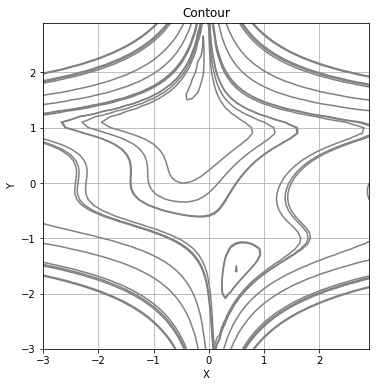

In [184]:
x = np.arange(-3, 3, 0.1)
y = np.arange(-3, 3, 0.1)
x, y = np.meshgrid(x, y)
fxy = f(x,y)
draw_contour(x,y,fxy)
plt.show()

# ADAM Optimizer

Optimal Solution at [-0.1530951218221798,2.111966998146015]:
Optimal Value: 11.549472974851568
Requrired Steps: 1048


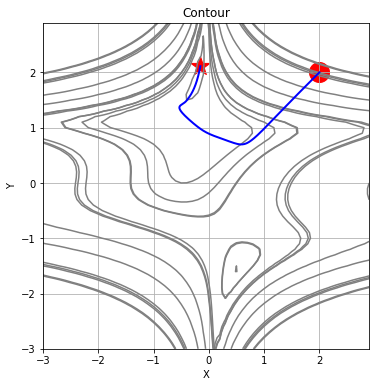

In [185]:
def ADAM_opti(x,alpha,beta1,beta2,e,error):
  points = []
  points.append(x)
  steps = 0
  h = 0
  d = 0 
  while(steps<2 or np.sqrt(np.sum(np.power(points[-1]-points[-2],2)))> error):
    steps = steps + 1
    gx = np.array(gradientF(points[-1][0],points[-1][1]))
    
    d = beta1*d + (1-beta1)*(gx)
    h = beta2*h + (1-beta2)*(np.power(gx,2))

    dc = np.divide(d,(1-np.power(beta1,steps)))
    hc = np.divide(h,(1-np.power(beta2,steps)))
    x = points[-1] - alpha*np.divide(dc,np.sqrt(hc)+e)
    points.append(x)
  return points,steps

ADAM_ans,steps = ADAM_opti(np.array([2,2]),0.1,0.9,0.999,1e-8,1e-4)
print("Optimal Solution at [{},{}]:".format(ADAM_ans[-1][0],ADAM_ans[-1][1]))
print("Optimal Value: {}".format(f(ADAM_ans[-1][0],ADAM_ans[-1][1])))
print("Requrired Steps: {}".format(steps))
x = np.arange(-3, 3, 0.1)
y = np.arange(-3, 3, 0.1)
x, y = np.meshgrid(x, y)
fxy = f(x,y)
plt = draw_contour(x,y,fxy)
draw_lines(ADAM_ans,plt,'blue','red')

# SGD Optimizer

Optimal Solution at [-0.15970893520478435,2.077666874805028]:
Optimal Value: 11.551650006538724
Requrired Steps: 2326


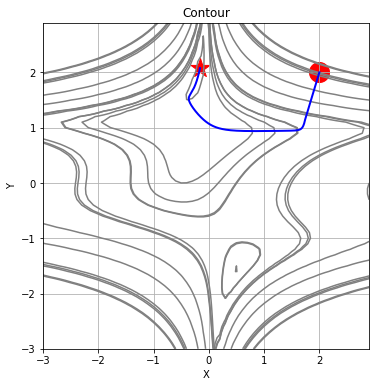

In [186]:
def SGD_opti(x,error,alpha):
  points = []
  points.append(x)
  steps = 0
  h = 0
  d = 0
  while(steps<2 or np.sqrt(np.sum(np.power(points[-1]-points[-2],2)))> error):
    steps = steps + 1
    gx = np.array(gradientF(points[-1][0],points[-1][1]))
    x = points[-1] - alpha*gx
    points.append(x)
  return points,steps

SGD_ans,steps = SGD_opti(np.array([2,2]),1e-4,0.001)
print("Optimal Solution at [{},{}]:".format(SGD_ans[-1][0],SGD_ans[-1][1]))
print("Optimal Value: {}".format(f(SGD_ans[-1][0],SGD_ans[-1][1])))
print("Requrired Steps: {}".format(steps))
x = np.arange(-3, 3, 0.1)
y = np.arange(-3, 3, 0.1)
x, y = np.meshgrid(x, y)
fxy = f(x,y)
plt = draw_contour(x,y,fxy)
draw_lines(SGD_ans,plt,'blue','red')

# RMSProp optimizer

Optimal Solution at [-0.14656739085043052,2.1148288025427173]:
Optimal Value: 11.552451309431738
Requrired Steps: 10002


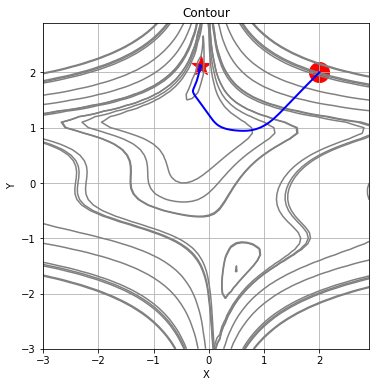

In [187]:
def RMS_opti(x,e,error,alpha,beta):
  points = []
  points.append(x)
  steps = 0
  h = 0
  d = 0
  while(steps<2 or np.sqrt(np.sum(np.power(points[-1]-points[-2],2)))> error):
    if(steps>10001):
      break
    steps = steps + 1
    gx = np.array(gradientF(points[-1][0],points[-1][1]))
    
    h = beta*h + (1-beta)*(np.power(gx,2))
    hc = np.divide(h,(1-np.power(beta,steps)))

    x = points[-1] - alpha*np.divide(gx,np.sqrt(hc)+e)
    points.append(x)
  return points,steps

RMS_ans,steps = RMS_opti(np.array([2,2]),1e-8,1e-6,0.01,0.9)
print("Optimal Solution at [{},{}]:".format(RMS_ans[-1][0],RMS_ans[-1][1]))
print("Optimal Value: {}".format(f(RMS_ans[-1][0],RMS_ans[-1][1])))
print("Requrired Steps: {}".format(steps))
x = np.arange(-3, 3, 0.1)
y = np.arange(-3, 3, 0.1)
x, y = np.meshgrid(x, y)
fxy = f(x,y)
plt = draw_contour(x,y,fxy)
draw_lines(RMS_ans,plt,'blue','red')

# Nesterov Optimizer

Optimal Solution at [-0.15113233854852848,2.1227131329337765]:
Optimal Value: 11.54933269583978
Requrired Steps: 4248


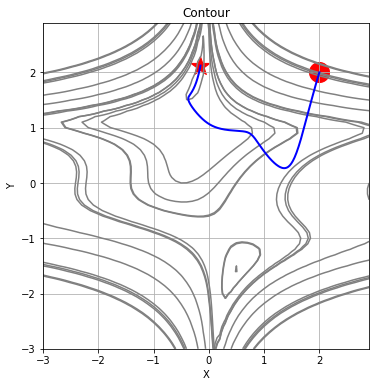

In [188]:
def nesterov_opti(x,e,error,alpha,beta):
  points = []
  points.append(x)
  steps = 0
  h = 0
  d = 0
  while(steps<2 or np.sqrt(np.sum(np.power(points[-1]-points[-2],2)))> error):
    if(steps>10001):
      break
    steps = steps + 1
    xadv = points[-1] - alpha*d
    gadvx = np.array(gradientF(xadv[0],xadv[1]))
    d = beta*d + (1-beta)*gadvx
    x = points[-1] - alpha*d
    points.append(x)
  return points,steps

nesterov_ans,steps = nesterov_opti(np.array([2,2]),1e-8,1e-6,0.001,0.9)
print("Optimal Solution at [{},{}]:".format(nesterov_ans[-1][0],nesterov_ans[-1][1]))
print("Optimal Value: {}".format(f(nesterov_ans[-1][0],nesterov_ans[-1][1])))
print("Requrired Steps: {}".format(steps))
x = np.arange(-3, 3, 0.1)
y = np.arange(-3, 3, 0.1)
x, y = np.meshgrid(x, y)
fxy = f(x,y)
plt = draw_contour(x,y,fxy)
draw_lines(nesterov_ans,plt,'blue','red')

# Momentum Optimizer

Optimal Solution at [-0.15113205909888183,2.1227146632694747]:
Optimal Value: 11.549332694318437
Requrired Steps: 4241


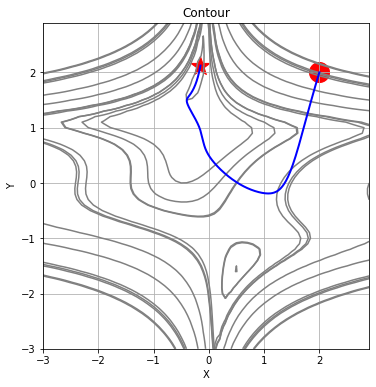

In [189]:
def momentum_opti(x,e,error,alpha,beta):
  points = []
  points.append(x)
  steps = 0
  h = 0
  d = 0
  while(steps<2 or np.sqrt(np.sum(np.power(points[-1]-points[-2],2)))> error):
    if(steps>10001):
      break
    steps = steps + 1
    gx = np.array(gradientF(points[-1][0],points[-1][1]))
    d = beta*d + (1-beta)*(-gx)
    x = points[-1] + alpha*d
    points.append(x)
  return points,steps

momentum_ans,steps = momentum_opti(np.array([2,2]),1e-8,1e-6,0.001,0.9)
print("Optimal Solution at [{},{}]:".format(momentum_ans[-1][0],momentum_ans[-1][1]))
print("Optimal Value: {}".format(f(momentum_ans[-1][0],momentum_ans[-1][1])))
print("Requrired Steps: {}".format(steps))
x = np.arange(-3, 3, 0.1)
y = np.arange(-3, 3, 0.1)
x, y = np.meshgrid(x, y)
fxy = f(x,y)
plt = draw_contour(x,y,fxy)
draw_lines(momentum_ans,plt,'blue','red')

# Combining Result and Observation



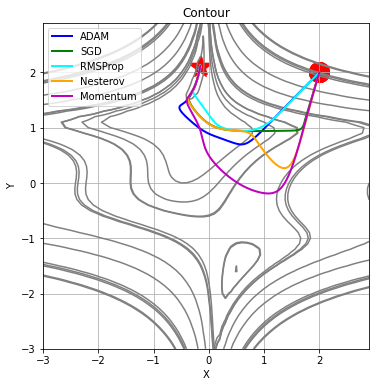

In [190]:
x = np.arange(-3, 3, 0.1)
y = np.arange(-3, 3, 0.1)
x, y = np.meshgrid(x, y)
fxy = f(x,y)
plt = draw_contour(x,y,fxy)
draw_lines(ADAM_ans,plt,'blue','red')
draw_lines(SGD_ans,plt,'green','red')
draw_lines(RMS_ans,plt,'cyan','red')
draw_lines(nesterov_ans,plt,'orange','red')
draw_lines(momentum_ans,plt,'m','red')
plt.legend(['ADAM', 'SGD', 'RMSProp', 'Nesterov','Momentum'])
plt.show()